---

## Artificial Intelligence - COMPSCI4004 2021-2022

## Lab Week 3: PEAS Model for AI tasks  <small><small>v20212022a</small></small>

----

**Aim**

We will model AI problems with the PEAS description.

We will formulate a **Maze-navigation** problem as a graph-search problem in Python and use the `AIMA Toolbox` (https://github.com/aimacode/aima-python) to suggest a solution (i.e., a set of actions) which hopefully leads the agent from the initial state to the goal state. 

Finally, you need to formulate the states and actions of the **Vacuum world** problem, that we discussed in the class.

**Objectives:**
* Given a particular AI problem, identify its PEAS (Performance Measure, Environment, Actuators, Sensors).
* Formulate the agent function as an graph-search problem based on the PEAS analysis/characterization (we will learn the actual graph search algorithm in our next lab).


**Guide**:

The notebook has two parts:
   - Part I: Runs through the basics of the software framework (including **visualisation of the state/action spaces**) of the AIMA toolkit. This part is solved.
   - Part II: In the second part, we ask you to the principles that you have just learned to solve the PEAS description of a different problem.

* <font color=dark-magenta>TASK:</font> This is a task for you to carry out before proceeding. If you're in doubt then consult the lab assistants. 
* A basic model solution (marked with <font color=red>SOLUTION</font>) for most questions will be provided at some point after the Lab session.

---
### Q3.0 Prerequisites / housekeeping

The notebook relies on the following software:
- A Python 3.7+ environment and additional packages (see the imports in sec Q3.0 for specific requirements)
- **AIMA Toolbox**: https://github.com/aimacode/aima-python which comes with the book (free) and contains off-the-shelf implementations of various search algorithms and many other relevant methods.However, we recommend you download a special as the github version is unstable and a few bug fixes have been made offline - you can download it from here: https://moodle.gla.ac.uk/draftfile.php/3941808/user/draft/336697470/aima-python-uofg.zip .
- The OpenAI Python package in Q3.4 (you can wait to install this)

#### Q3.0.1 Import the basics

* <font color=dark-magenta>TASK:</font> Run the following cell which loads the very basic Python modules and checks the environmental variables

In [1]:
# Check the very basics
import os, sys
print("Working dir:"+os.getcwd())
print("Python version:"+sys.version)

Working dir:/Users/debasis/teaching/ai-2023/labs_restructured/lab_week2
Python version:3.8.5 (default, Sep  4 2020, 02:22:02) 
[Clang 10.0.0 ]


#### Q3.0.2 Import Python core modules

* <font color=dark-magenta>TASK:</font> Run the following code to import core Python models

In [2]:
from copy import deepcopy 
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import lines

#### Q3.0.2 Import Python Network/Graph modules

* <font color=dark-magenta>TASK:</font> Run the cell to import the graph module allowing you to work with graphs in Python:

In [3]:
import networkx as nx
print("networkx version: "+nx.__version__)

networkx version: 2.5


#### Q3.0.2 Import Python visualization modules


* <font color=dark-magenta>TASK:</font> Import modules which allows you to visualise the graphs and solutions. Note: You can skip this step if you fail installing the the `ipywidgets` Python package however you will not be able to interactively visualize the graphs and solutions. `ipywidgets`  is easy to install ia the Anaconda package but can be tricky to run on custom Python setups in which case we recommend skipping the step.

In [4]:
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
print("ipywidgets version: " + widgets.__version__)

ipywidgets version: 7.5.1


#### Q3.0.2 Import the AIMA Toolbox


* <font color=dark-magenta>TASK:</font> Download/pull the AIMA toolbox from https://moodle.gla.ac.uk/mod/resource/view.php?id=1374098

* <font color=dark-magenta>TASK:</font> Import the AIMA toolbox into the search path. Remember to change the `AIMA_TOOLBOX_ROOT` variable to match the relevant folder on your system

In [5]:
# Add path the to the AIMA Python Toolbox folder on your system
# WARNING: It is important that you use forward slash, even on Windows machines !

AIMA_TOOLBOX_ROOT="/Users/debasis/teaching/ai-2023/aima-python-uofg/"
sys.path.append(AIMA_TOOLBOX_ROOT)

* <font color=dark-magenta>TASK:</font>  Run the following code to import the search package in the AIMA toolbox

In [6]:
from search import *
from notebookutils import psource, heatmap, gaussian_kernel, show_map, final_path_colors, display_visual, plot_NQueens
# Needed to hide warnings in the matplotlib sections
import warnings
warnings.filterwarnings("ignore")

/Users/debasis/teaching/ai-2023/aima-python-uofg/notebookutils.py:779: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if len(bc_out) is 0:


... you should now be ready to solve a deterministic AI problem!

----

### Q3.1 The Maze

Figure 1 shows a Maze. You are now given the task to design an intelligent agent that can plan a route from S (with coordinates (0,0)) to G (with coordinates (1,9) ).

<img src="resources/maze.png" width=40%>
<center>Figure 1: A Maze. Unavailable states are indicated by a black square. S is the start state. G is is the goal state.</center>

In the following, we will explore how to approach this problem and implement a reasonable solution in Python.

---

#### Q3.1.1 Analysis

- <font color=dark-magenta>TASK:</font> Analyse the problem and task environment using the PEAS framework. Note: you will need to make assumptions; make sure to state them:

    - Performance measure
        - As the designer of the Maze-solving agent, define a suitable performance measure?
    - Environment
        - Characterise the task environment along the dimensions outlined in AIMA Chapter 2 (lecture 1)?
    - Actuators        
        - Provide a list of actuators and possible actions ?
    - Sensors
        - Determine the percept available to the Maze-solving agent ?

----

#### Q3.1.2 Problem representation via graphs

In this part we will build a graph representation of the state-space including the actions __assuming__ it is discrete, fully observable, static, deterministic and known. Recall from the lecture notes that we talked about the vaccum world and 2D mazes.

##### Q3.1.2 (a) Define states and actions in a table

- <font color=dark-magenta>TASK:</font>: Run the cells to define your state-space as a table Hint: the S state is (0,0) and the G state is (1.9)!). The names of the states are chosen as S_%2d_%2d to identify the row and the column. In this case %1d formatting could have worked because we have a 10x10 grid.

- Double check that the code provided below is correct!
 - Hint: `S_08_00=dict(S_09_00=1,S_07_00=1)` means that we have a unique state "S_08_00" from which you can get to S_09_00 and S_07_00 with cost 1.
 
- <font color=dark-magenta>TASK:</font>: Manually analyse - How many shortest paths are there from Start to Goal?
- <font color=dark-magenta>TASK:</font>: Try making the maze harder and easier (possibly by removing/adding walls). Convince yourself on what makes a maze (a discrete optimisation problem, in. general) harder or easier.


In [7]:
maze_map = UndirectedGraph(dict(
    S_00_00=dict(S_01_00=1),
    S_01_00=dict(S_01_01=1),
    S_03_00=dict(S_04_00=1,S_03_01=1),
    S_04_00=dict(S_03_00=1),
    S_07_00=dict(S_08_00=1),
    S_08_00=dict(S_09_00=1,S_07_00=1),
    S_09_00=dict(S_08_00=1,S_09_01=1),
    S_01_01=dict(S_01_00=1,S_02_01=1),
    S_02_01=dict(S_01_01=1,S_03_01=1),
    S_03_01=dict(S_03_00=1,S_03_02=1),
    S_09_01=dict(S_09_00=1),
    S_03_02=dict(S_03_01=1,S_04_02=1),
    S_04_02=dict(S_03_02=1,S_05_02=1,S_04_03=1),
    S_05_02=dict(S_04_02=1,S_05_03=1),
    S_01_03=dict(S_01_04=1,S_02_03=1),
    S_02_03=dict(S_01_03=1,S_02_04=1),
    S_04_03=dict(S_04_02=1,S_05_03=1,S_04_04=1),
    S_05_03=dict(S_05_02=1,S_06_03=1,S_04_03=1,S_05_04=1),
    S_06_03=dict(S_05_03=1,S_06_04=1),
    S_08_03=dict(S_08_04=1),
    S_01_04=dict(S_01_03=1,S_02_04=1),
    S_02_04=dict(S_01_04=1,S_02_05=1,S_02_03=1,S_03_04=1),
    S_03_04=dict(S_03_05=1,S_02_04=1,S_04_04=1),
    S_04_04=dict(S_04_03=1,S_03_04=1,S_05_04=1),
    S_05_04=dict(S_04_04=1,S_05_05=1,S_06_04=1,S_05_03=1),
    S_06_04=dict(S_06_03=1,S_07_04=1,S_05_04=1),
    S_07_04=dict(S_06_04=1,S_07_05=1,S_08_04=1),
    S_08_04=dict(S_07_04=1,S_08_03=1,S_08_05=1),
    S_00_05=dict(S_00_06=1),
    S_02_05=dict(S_02_06=1,S_02_04=1,S_03_05=1),
    S_03_05=dict(S_02_05=1,S_03_04=1),
    S_05_05=dict(S_05_04=1,S_05_06=1),
    S_07_05=dict(S_08_05=1,S_07_04=1,S_07_06=1),
    S_08_05=dict(S_09_05=1,S_07_05=1,S_08_04=1),
    S_09_05=dict(S_09_06=1,S_08_05=1),
    S_00_06=dict(S_00_07=1,S_00_05=1,S_01_06=1),
    S_01_06=dict(S_00_06=1,S_01_07=1,S_02_06=1),
    S_02_06=dict(S_02_07=1,S_02_05=1,S_01_06=1),
    S_04_06=dict(S_05_06=1,S_04_07=1),
    S_05_06=dict(S_04_06=1,S_06_06=1,S_05_05=1,S_05_07=1),
    S_06_06=dict(S_07_06=1,S_06_07=1,S_05_06=1),
    S_07_06=dict(S_06_06=1,S_07_05=1),
    S_09_06=dict(S_09_05=1,S_09_07=1),
    S_00_07=dict(S_00_08=1,S_01_07=1,S_00_06=1),
    S_01_07=dict(S_00_07=1,S_02_07=1,S_01_08=1,S_01_06=1),
    S_02_07=dict(S_01_07=1,S_03_07=1,S_02_06=1,S_02_08=1),
    S_03_07=dict(S_04_07=1,S_02_07=1),
    S_04_07=dict(S_03_07=1,S_05_07=1,S_04_08=1,S_04_06=1),
    S_05_07=dict(S_04_07=1,S_06_07=1,S_05_08=1,S_05_06=1),
    S_06_07=dict(S_06_06=1,S_06_08=1,S_05_07=1),
    S_08_07=dict(S_09_07=1),
    S_09_07=dict(S_08_07=1,S_09_06=1),
    S_00_08=dict(S_00_09=1,S_01_08=1,S_00_07=1),
    S_01_08=dict(S_00_08=1,S_02_08=1,S_01_09=1,S_01_07=1),
    S_02_08=dict(S_02_09=1,S_02_07=1,S_01_08=1),
    S_04_08=dict(S_04_09=1,S_05_08=1,S_04_07=1),
    S_05_08=dict(S_04_08=1,S_06_08=1,S_05_09=1,S_05_07=1),
    S_06_08=dict(S_07_08=1,S_06_07=1,S_05_08=1),
    S_07_08=dict(S_07_09=1,S_06_08=1),
    S_01_09=dict(S_01_08=1),
    S_00_09=dict(S_01_09=1,S_00_08=1),
    S_02_09=dict(S_01_09=1,S_02_08=1),
    S_04_09=dict(S_04_08=1,S_05_09=1),
    S_05_09=dict(S_05_08=1,S_04_09=1),
    S_07_09=dict(S_07_08=1)))

In [8]:
maze_map.locations = dict(
    S_00_00=(0,0),
    S_01_00=(1,0),
    S_03_00=(3,0),
    S_04_00=(4,0),
    S_07_00=(7,0),
    S_08_00=(8,0),
    S_09_00=(9,0),
    S_01_01=(1,1),
    S_02_01=(2,1),
    S_03_01=(3,1),
    S_09_01=(9,1),
    S_03_02=(3,2),
    S_04_02=(4,2),
    S_05_02=(5,2),
    S_01_03=(1,3),
    S_02_03=(2,3),
    S_04_03=(4,3),
    S_05_03=(5,3),
    S_06_03=(6,3),
    S_08_03=(8,3),
    S_01_04=(1,4),
    S_02_04=(2,4),
    S_03_04=(3,4),
    S_04_04=(4,4),
    S_05_04=(5,4),
    S_06_04=(6,4),
    S_07_04=(7,4),
    S_08_04=(8,4),
    S_00_05=(0,5),
    S_02_05=(2,5),
    S_03_05=(3,5),
    S_05_05=(5,5),
    S_07_05=(7,5),
    S_08_05=(8,5),
    S_09_05=(9,5),
    S_00_06=(0,6),
    S_01_06=(1,6),
    S_02_06=(2,6),
    S_04_06=(4,6),
    S_05_06=(5,6),
    S_06_06=(6,6),
    S_07_06=(7,6),
    S_09_06=(9,6),
    S_00_07=(0,7),
    S_01_07=(1,7),
    S_02_07=(2,7),
    S_03_07=(3,7),
    S_04_07=(4,7),
    S_05_07=(5,7),
    S_06_07=(6,7),
    S_08_07=(8,7),
    S_09_07=(9,7),
    S_00_08=(0,8),
    S_01_08=(1,8),
    S_02_08=(2,8),
    S_04_08=(4,8),
    S_05_08=(5,8),
    S_06_08=(6,8),
    S_07_08=(7,8),
    S_00_09=(0,9),
    S_01_09=(1,9),
    S_02_09=(2,9),
    S_04_09=(4,9),
    S_05_09=(5,9),
    S_07_09=(7,9))

maze_map_locations = maze_map.locations

In [9]:
print("----------------------------") 
print("Unique states/nodes (i.e.locations) and possible actions in those states:\n") 
print(maze_map.locations) 

----------------------------
Unique states/nodes (i.e.locations) and possible actions in those states:

{'S_00_00': (0, 0), 'S_01_00': (1, 0), 'S_03_00': (3, 0), 'S_04_00': (4, 0), 'S_07_00': (7, 0), 'S_08_00': (8, 0), 'S_09_00': (9, 0), 'S_01_01': (1, 1), 'S_02_01': (2, 1), 'S_03_01': (3, 1), 'S_09_01': (9, 1), 'S_03_02': (3, 2), 'S_04_02': (4, 2), 'S_05_02': (5, 2), 'S_01_03': (1, 3), 'S_02_03': (2, 3), 'S_04_03': (4, 3), 'S_05_03': (5, 3), 'S_06_03': (6, 3), 'S_08_03': (8, 3), 'S_01_04': (1, 4), 'S_02_04': (2, 4), 'S_03_04': (3, 4), 'S_04_04': (4, 4), 'S_05_04': (5, 4), 'S_06_04': (6, 4), 'S_07_04': (7, 4), 'S_08_04': (8, 4), 'S_00_05': (0, 5), 'S_02_05': (2, 5), 'S_03_05': (3, 5), 'S_05_05': (5, 5), 'S_07_05': (7, 5), 'S_08_05': (8, 5), 'S_09_05': (9, 5), 'S_00_06': (0, 6), 'S_01_06': (1, 6), 'S_02_06': (2, 6), 'S_04_06': (4, 6), 'S_05_06': (5, 6), 'S_06_06': (6, 6), 'S_07_06': (7, 6), 'S_09_06': (9, 6), 'S_00_07': (0, 7), 'S_01_07': (1, 7), 'S_02_07': (2, 7), 'S_03_07': (3, 7), 'S

---

##### Q3.1.2 (b) Create the graph object

- <font color=dark-magenta>TASK:</font>: Execute the following cell to define a graph object based on the map and transition models defined in the previous question.

In [10]:
# node colors, node positions and node label positions
node_colors = {node: 'white' for node in maze_map.locations.keys()}
node_positions = maze_map.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in maze_map.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in maze_map.graph_dict.items() for k2, v2 in v.items()}

maze_graph_data = {  'graph_dict' : maze_map.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                        'edge_weights': edge_weights
                     }

print("Done creating the graph object")

Done creating the graph object


----

##### Q3.1.2 (c) Visualise the graph

- <font color=dark-magenta>TASK:</font>:  Execute the cells to visualize the graph and check that everything is as expected:

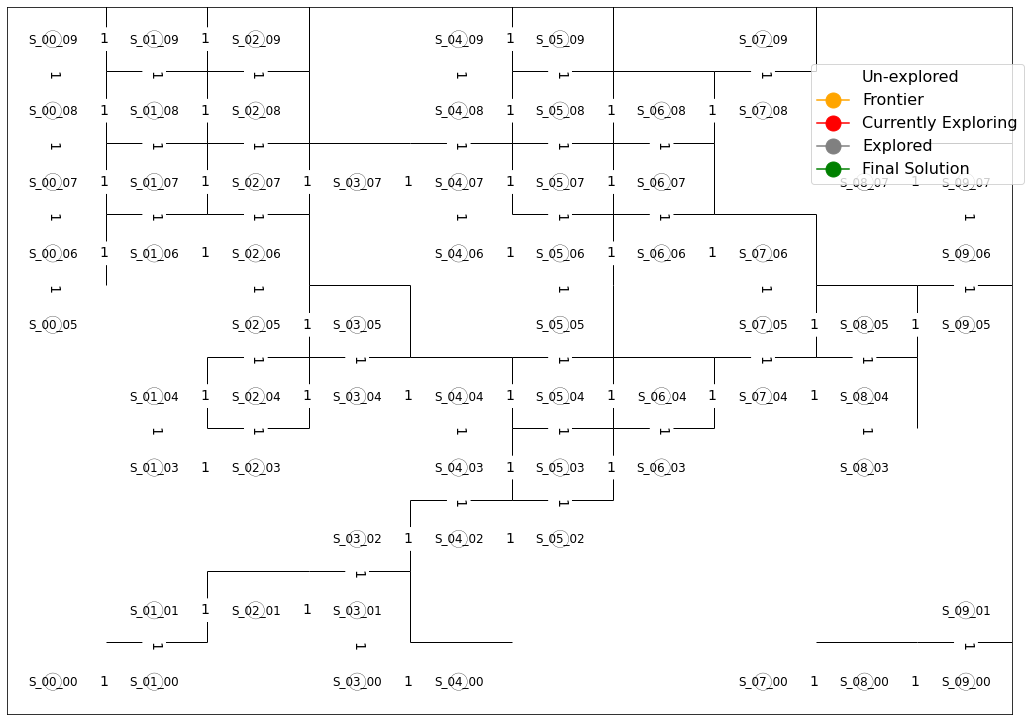

In [11]:
show_map(maze_graph_data)

- <font color=dark-magenta>TASK:</font> Inspect the map and make sure you can map it to Figure 1. I.e. where is S_00_00 ?

----

### Q3.2 Solving the graph problem

Now that the graph/map has been completed in Q3.1.6 (c), we will try to design a simple agent to find a viable path.

#### Q3.2.1 Define the problem using the AIMA toolbox:

Remember, we want to go from state S_00_00 to S_01_09:

- <font color=dark-magenta>TASK:</font>: Run the follwing code to instantiate the problem

See how the task of finding a solution through a maze has been **generalised** as a *Graph Problem*. Can you think of another AI task, which we can model by this AIMA class?

In [12]:
maze_problem = GraphProblem('S_00_00', 'S_01_09', maze_map)

print("Initial state: " + maze_problem.initial)
print("Goal state: "    + maze_problem.goal)

Initial state: S_00_00
Goal state: S_01_09


### Q3.3 Vacuum world problem

- Based on the above example, your task is now to represent the vacuum world problem.
<img src="resources/figure23_vac.jpg" width="800px">


- <font color=dark-magenta>TASK:</font>: Define the Graph of the States using the AIMA class.
- <font color=dark-magenta>TASK:</font>: Define the State, Action --> State by adding edges.
- <font color=dark-magenta>TASK:</font>: Visualise the graph.


<font color=red>SOLUTION</font> Released after the lab hours.

<pre>
Eight possible states of the vacumm world
Each state is represented as
   *       "State of the left room"      "State of the right room"   "Room in which the agent
                                                                      is present"
S_00_00 1 - DDL     Dirty                         Dirty                       Left
S_01_00 2 - DDR     Dirty                         Dirty                       Right
S_02_00 3 - DCL     Dirty                         Clean                       Left
S_03_00 4 - DCR     Dirty                         Clean                       Right
S_00_02 5 - CDL     Clean                         Dirty                       Left
S_01_02 6 - CDR     Clean                         Dirty                       Right
S_02_02 7 - CCL     Clean                         Clean                       Left
S_03_02 8 - CCR     Clean                         Clean                       Right

Actions

Suck S_00_01
Right S_01_01
Left S_02_01


And here are the state names

</pre>


In [13]:
S_00_00 = "DDL"
S_01_00 = "DDR"
S_02_00 = "DCL"
S_03_00 = "DCR"
S_00_02 = "CDL"
S_01_02 = "CDR"
S_02_02 = "CCL"
S_03_02 = "CCR"
S_00_01 = "Suck"
S_01_01 = "Right"
S_02_01 = "Left"


With the above description, we now define the graph as follows.

In [14]:
vacuum_world = Graph(dict(
    S_00_00=dict(S_00_01=S_00_02, S_01_01=S_01_00, S_02_01=S_00_00),
    S_01_00=dict(S_00_01=S_03_00, S_01_01=S_01_02, S_02_01=S_00_00),
    S_02_00=dict(S_00_01=S_02_02, S_01_01=S_03_00, S_02_01=S_02_00),
    S_03_00=dict(S_00_01=S_03_00, S_01_01=S_03_00, S_02_01=S_02_00),
    S_00_02=dict(S_00_01=S_00_02, S_01_01=S_01_02, S_02_01=S_00_02),
    S_01_02=dict(S_00_01=S_03_02, S_01_01=S_01_02, S_02_01=S_00_02),
    S_02_02=dict(S_00_01=S_02_02, S_01_01=S_03_02, S_02_01=S_02_02),
    S_03_02=dict(S_00_01=S_03_02, S_01_01=S_03_02, S_02_01=S_02_02)    
))

vacuum_world.locations = dict(
    # states
    S_00_00=(0,0),
    S_01_00=(1,0),
    S_02_00=(2,0),
    S_03_00=(3,0),
    S_00_02=(0,1),
    S_01_02=(1,1),
    S_02_02=(2,1),
    S_03_02=(3,1),
    # actions
    S_00_01=(0,2),
    S_01_01=(1,2),
    S_02_01=(2,2)    
)
    

Similar to the maze problem, we define the node colors and locations. For easy visualisation, the action nodes are displayed along the middle column.

Done creating the graph object


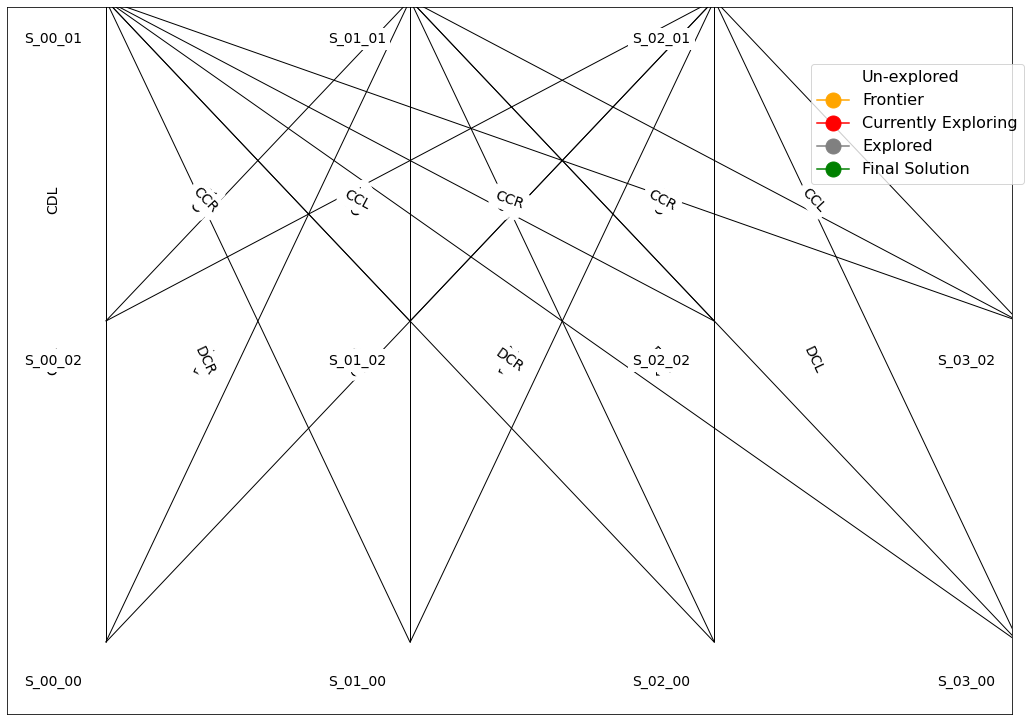

In [15]:
# node colors, node positions and node label positions
node_colors = {node: 'white' for node in vacuum_world.locations.keys()}
node_positions = vacuum_world.locations
node_label_pos = { k:[v[0],v[1]]  for k,v in vacuum_world.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in vacuum_world.graph_dict.items() for k2, v2 in v.items()}

vacuum_world_data = {  'graph_dict' : vacuum_world.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                        'edge_weights': edge_weights
                     }

print("Done creating the graph object")
show_map(vacuum_world_data)

----

In [16]:
vacuum_problem = GraphProblem(S_00_00, S_02_02, vacuum_world)

print("Initial state: " + vacuum_problem.initial)
print("Goal state: "    + vacuum_problem.goal)

Initial state: DDL
Goal state: CCL


---

Now imagine that the maze environment now has wormholes that "teleports" an agent directly from one cell to another. The agent can "see" the start of a wormhole but can't "see" it's end (i.e., it doesn't know where it will take it to). So, an agent either gains or loses time depending on whether the wormhole ends up transporting the agent either closer or farther away from the goal.

The following is a maze with wormholes.
<img src="resources/maze-with-wormholes.png" width=40%>
<center>A Maze with wormholes. Obstacles are indicated by a black square. S is the start state. G is is the goal state. Wormholes are shown in orange. (1,2)->(1,7) is a rewarding wormhole; whereas (7, 4)-->(0,5) is not.</center>

<font color=dark-magenta>TASK:</font>: Clearly write the PEAS description of this maze-with-wromholes environment.

- **P**erformance measure
    - Minimize: the number of steps to get out of the maze (If you're taking good wormholes, that will be reflected in this performance measure because it will lead to a quicker escape).
    
- **E**nvironment
    - Size of the maze, Start, End locations, Obstacle and wormhole locations.
    
- **A**ctuators        
    - Move left, right, up or down from a cell (again no change in the action space due to the wormholes)
    
- **S**ensors
    - Can detect a free square, an obstacle, a wormhole.